In [1]:
#Carrega os pacotes
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
#Dados das variaveis de treino
train_variants_df = pd.read_csv("training_variants")
train_variants_df.shape

(3321, 4)

In [3]:
#Dados dos textos de treino
train_text_df = pd.read_csv("training_text", sep="\|\|", engine='python', header = None, names=["ID","Text"], skiprows=1)
train_text_df.shape

(3321, 2)

In [5]:
#Juntando os datdasets (subtraíndo 1 das classes para que se iniciem com 0)
df = pd.merge(train_variants_df, train_text_df, how='left', on='ID')
df['Class'] = df['Class'] - 1
df.head()

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,1,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,1,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,2,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,3,Oncogenic mutations in the monomeric Casitas B...


In [6]:
df.shape

(3321, 5)

In [7]:
# Valores NA
TextNA = df['Text'].isna()
print('Existem %.0f valores NA' % TextNA[TextNA == True].shape[0])

Existem 5 valores NA


In [8]:
# Removendo os valores missing
df = df.drop(TextNA[TextNA == True].index)
df.reset_index(drop=True)

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,1,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,1,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,2,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,3,Oncogenic mutations in the monomeric Casitas B...
5,5,CBL,V391I,3,Oncogenic mutations in the monomeric Casitas B...
6,6,CBL,V430M,4,Oncogenic mutations in the monomeric Casitas B...
7,7,CBL,Deletion,0,CBL is a negative regulator of activated recep...
8,8,CBL,Y371H,3,Abstract Juvenile myelomonocytic leukemia (JM...
9,9,CBL,C384R,3,Abstract Juvenile myelomonocytic leukemia (JM...


Text(0,0.5,'Frequência')

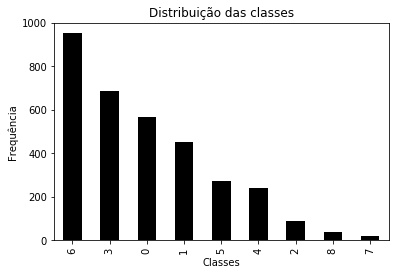

In [9]:
#Verificando a distribuição das classes
ax = df['Class'].value_counts().plot(kind='bar', color='black', title = 'Distribuição das classes')
ax.set_xlabel('Classes')
ax.set_ylabel('Frequência')

Temos pouquíssimos casos para as classes 2, 7 e 8, dificultando sua detecção. Teremos que balancear o dataset.

In [10]:
# Vamos verificar as palavras mais frequentes associadas com cada uma das classes

# Agrupando as classes e transformando o texto em uma grande String
palavras = df.groupby('Class').apply(lambda x: x['Text'].str.cat())

In [11]:
# Importando funções do sklearn para tratamento do dados
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
# Calculando as frequências
stopWords = set(stopwords.words('english'))
vectorizer = CountVectorizer(stop_words=stopWords)
X = vectorizer.fit_transform(palavras)

In [13]:
# Crianda um dataframe com as paralavras mais frequentes 
def PalavrasFrequentesPorClasse(palavras, frequencias):
    dfTopWords = pd.DataFrame()
    for linha in range(len(frequencias)):
        dfTemp = pd.DataFrame({'Classe'+str(linha+1): palavras, 'Freq'+str(linha+1): frequencias[linha]})
        dfTemp = dfTemp.sort_values(by=['Freq'+str(linha+1)], ascending=False)
        dfTopWords = pd.concat([dfTopWords, dfTemp.reset_index(drop=True)], axis=1)
    return dfTopWords

In [14]:
# Crianda um dataframe com as palavras mais frequentes dado a classe
def PalavrasFrequentesTotalClasses(palavras, frequencias, n):
    for linha in range(len(frequencias)):
        dfTemp = pd.DataFrame({'Palavra': palavras, 'Freq'+str(linha+1): frequencias[linha]})
        if linha == 0:
            dfTopWordsClasses = dfTemp.sort_values(by=['Freq'+str(linha+1)], ascending=False)[0:20]
        else:
            dfTemp = dfTemp.sort_values(by=['Freq'+str(linha+1)], ascending=False)
            dfTopWordsClasses = pd.merge(dfTopWordsClasses, dfTemp[0:n], how='outer', on='Palavra')
    dfTopWordsClasses['TotalClasses'] = dfTopWordsClasses.count(axis='columns', numeric_only=True)
    return dfTopWordsClasses.sort_values(by=['TotalClasses'], ascending=False)

In [15]:
# Top 10 palavras mais frequêntes por classe
dfTopWords = PalavrasFrequentesPorClasse(vectorizer.get_feature_names(), X.toarray())
dfTopWords.head(10)

,Classe1,Freq1,Classe2,Freq2,Classe3,Freq3,Classe4,Freq4,Classe5,Freq5,Classe6,Freq6,Classe7,Freq7,Classe8,Freq8,Classe9,Freq9
0,mutations,33719,mutations,34570,mutations,6243,mutations,46483,brca1,14396,âˆ,20191,mutations,86824,cells,1374,cells,3924
1,cells,28402,cells,23143,brca1,4191,cells,37077,variants,14365,brca1,14027,cells,73838,mutations,1329,mutations,3590
2,cell,20282,patients,19183,cells,3900,pten,25777,mutations,13049,mutations,12135,cell,52942,al,1033,mutant,2848
3,p53,19152,cell,18237,al,3016,protein,23992,cancer,7866,variants,11452,patients,43128,et,1026,sf3b1,2764
4,et,18973,mutation,15148,variants,2936,et,21997,cells,7500,cancer,7000,mutation,38461,expression,910,cell,2332
5,al,18871,et,14718,et,2843,al,21866,protein,6111,mutation,6819,fig,37246,figure,855,figure,2215
6,fig,18099,al,14653,cancer,2648,activity,21596,mutation,5782,cells,6477,egfr,36421,cell,768,splicing,2178
7,protein,17950,cancer,13217,mutation,2183,fig,21193,functional,5648,fig,6179,et,35244,fig,668,et,2035
8,cancer,17907,figure,13006,figure,2181,cell,21150,fig,5558,deleterious,5642,al,35159,genes,646,al,2030
9,mutation,17228,kinase,12615,alk,2075,figure,19398,type,5444,data,5482,figure,35016,gene,617,idh1,1897


Algumas palavras são muito comuns, como: mutations, cells, cell, et, al...

In [17]:
# Palavras frequentes em todas as classes
dfTopWordsClasses = PalavrasFrequentesTotalClasses(vectorizer.get_feature_names(), X.toarray(), 50)
dfTopWordsClasses[dfTopWordsClasses['TotalClasses'] == 9]

,Palavra,Freq1,Freq2,Freq3,Freq4,Freq5,Freq6,Freq7,Freq8,Freq9,TotalClasses
0,mutations,33719.0,34570.0,6243.0,46483.0,13049.0,12135.0,86824.0,1329.0,3590.0,9
7,protein,17950.0,7777.0,1611.0,23992.0,6111.0,4766.0,20340.0,367.0,909.0,9
17,mutant,12693.0,8294.0,1380.0,14022.0,2974.0,2962.0,27474.0,617.0,2848.0,9
14,expression,14532.0,9894.0,1528.0,16113.0,3415.0,2660.0,26844.0,910.0,1728.0,9
13,type,15172.0,7304.0,1301.0,16891.0,5444.0,4306.0,19906.0,410.0,1494.0,9
10,figure,17109.0,13006.0,2181.0,19398.0,4241.0,4383.0,35016.0,855.0,2215.0,9
8,cancer,17907.0,13217.0,2648.0,16655.0,7866.0,7000.0,32058.0,557.0,893.0,9
9,mutation,17228.0,15148.0,2183.0,17874.0,5782.0,6819.0,38461.0,572.0,1190.0,9
6,fig,18099.0,12555.0,1428.0,21193.0,5558.0,6179.0,37246.0,668.0,1341.0,9
5,al,18871.0,14653.0,3016.0,21866.0,3829.0,3887.0,35159.0,1033.0,2030.0,9


In [19]:
# Colocando as palavras frequêntes em lista para adicionar no stopWords
palavrasFrequentes = dfTopWordsClasses['Palavra'].values[dfTopWordsClasses['TotalClasses'] == 9]
palavrasFrequentes

array(['mutations', 'protein', 'mutant', 'expression', 'type', 'figure',
       'cancer', 'mutation', 'fig', 'al', 'et', 'cells', 'cell'],
      dtype=object)

In [20]:
#Fazendo a mesma busca para pares de palavras
vectorizer2 = CountVectorizer(stop_words=stopWords, ngram_range=(2, 2))
X2 = vectorizer2.fit_transform(palavras)

In [22]:
# Palavras frequêntes por classe (ngram = 2)
dfTopWords2 = PalavrasFrequentesPorClasse(vectorizer2.get_feature_names(), X2.toarray())
dfTopWords2.head(10)

,Classe1,Freq1,Classe2,Freq2,Classe3,Freq3,Classe4,Freq4,Classe5,Freq5,Classe6,Freq6,Classe7,Freq7,Classe8,Freq8,Classe9,Freq9
0,et al,18822,et al,14566,et al,2809,et al,21790,wild type,4532,et al,3882,et al,34754,et al,1026,et al,2030
1,wild type,11947,wild type,4995,wild type,1157,wild type,13405,et al,3822,wild type,3210,wild type,15111,wild type,307,wild type,1380
2,cell lines,4243,cell lines,4141,amino acid,529,missense mutations,4760,vus neutral,1990,family history,2261,cell lines,12718,dna methylation,207,cell lines,546
3,dna binding,3120,kinase domain,2603,breast cancer,490,cell lines,4532,author manuscript,1682,brca1 brca2,1931,kinase domain,7036,gene expression,200,sf3b1 mutations,442
4,amino acid,3014,egfr mutations,2562,brca1 variants,479,amino acid,4502,brca1 variants,1428,breast cancer,1339,tyrosine kinase,6513,histone h3,184,sf3b1 mutant,408
5,breast cancer,2957,tyrosine kinase,2022,vus neutral,416,pten mutations,3682,embryonic stem,1420,âˆ âˆ,1179,egfr mutations,6137,cell lines,182,mutant idh1,335
6,amino acids,2498,cyclin d1,1796,mtor mutations,405,phosphatase activity,3010,brca1 brct,1301,deleterious mutation,1172,ba f3,5404,supplementary table,136,bone marrow,334
7,missense mutations,2416,cell line,1790,cells expressing,391,tumor suppressor,2896,cell lines,1244,ligase activity,1132,cell line,5404,al 2009,133,gene expression,326
8,supplementary fig,2345,lung cancer,1790,ƒâ ƒâ,372,amino acids,2856,stem cells,1166,cell lines,1058,lung cancer,5375,al 2010,132,mutant idh,321
9,figure figure,2075,amino acid,1751,alk mutations,366,dna binding,2560,pa author,1134,amino acid,1024,kinase activity,5196,supplementary fig,132,supplementary table,320


In [23]:
# Top pares de palavras presentes em pelo menos 7 classes
dfTopWordsClasses2 = PalavrasFrequentesTotalClasses(vectorizer2.get_feature_names(), X2.toarray(), 50)
dfTopWordsClasses2[dfTopWordsClasses2['TotalClasses'] > 6]

,Palavra,Freq1,Freq2,Freq3,Freq4,Freq5,Freq6,Freq7,Freq8,Freq9,TotalClasses
0,et al,18822.0,14566.0,2809.0,21790.0,3822.0,3882.0,34754.0,1026.0,2030.0,9
2,cell lines,4243.0,4141.0,331.0,4532.0,1244.0,1058.0,12718.0,182.0,546.0,9
1,wild type,11947.0,4995.0,1157.0,13405.0,4532.0,3210.0,15111.0,307.0,1380.0,9
11,cell line,1865.0,1790.0,284.0,1877.0,531.0,NaN,5404.0,63.0,219.0,8
4,amino acid,3014.0,1751.0,529.0,4502.0,1133.0,1024.0,4139.0,85.0,NaN,8
5,breast cancer,2957.0,1266.0,490.0,2023.0,1092.0,1339.0,3169.0,59.0,NaN,8
6,amino acids,2498.0,853.0,251.0,2856.0,537.0,764.0,2309.0,52.0,NaN,8
30,cells expressing,NaN,1440.0,391.0,1426.0,527.0,477.0,5151.0,92.0,207.0,8
8,supplementary fig,2345.0,1595.0,NaN,1724.0,798.0,950.0,2819.0,132.0,258.0,8
13,supplementary table,1731.0,1189.0,186.0,1455.0,952.0,NaN,2064.0,136.0,320.0,8


In [24]:
# Definindo nova lista de stopWords com palavras mais comuns
stopWords = set(stopwords.words('english') + list(palavrasFrequentes))

In [ ]:
#Montando a matriz Tf-idf final
def MontaTfidf(corpus, stopWords):
    vectorizer = TfidfVectorizer(stop_words=stopWords)
    X = vectorizer.fit_transform(corpus)
    df_Tfindf = pd.DataFrame(X.todense().tolist(), columns=vectorizer.get_feature_names())
    return(df_Tfindf)

In [ ]:
# Gera matriz Tfidf e salva em hdf
df_Tfindf = MontaTfidf(df['Text'].values, stopWords)
df_Tfindf.to_hdf('TfidfTrain.hdf', 'main', format='fixed')

In [25]:
# Carrega matriz Tfidf
df_Tfindf = pd.read_hdf('TfidfTrain.hdf')

In [26]:
df_Tfindf.shape

(3316, 164620)

In [27]:
df_Tfindf.head()

,00,000,0000,0000000000000188,00000001,0000001,000000100,000001,000002,00000397,...,ˆ9,ˆ90,ˆ90â,ˆ91,ˆ97,ˆarg,ˆequal,ˆi,ˆiã,ˆã
0,0.0,0.017777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.008309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.008309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.005813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# Concatena a matriz com as clases
df_Tfindf = pd.concat([df_Tfindf, df['Class']], axis=1, join = 'inner')

In [29]:
df_Tfindf.head()

,00,000,0000,0000000000000188,00000001,0000001,000000100,000001,000002,00000397,...,ˆ90,ˆ90â,ˆ91,ˆ97,ˆarg,ˆequal,ˆi,ˆiã,ˆã,Class
0,0.0,0.017777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.008309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.008309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.005813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [30]:
# Agrupa as palavras por classe para realizar feature selection
df_TfindfCount = df_Tfindf.groupby('Class').apply(lambda column: (column != 0).sum()).transpose()
df_TfindfCount = df_TfindfCount / df_Tfindf.groupby('Class').count().transpose()
df_TfindfCount['Media'] = df_TfindfCount[df_TfindfCount.columns[0:9]].mean(1)
df_TfindfCount['Desvio'] = df_TfindfCount[df_TfindfCount.columns[0:9]].std(1)
df_TfindfCount['M_D'] = df_TfindfCount['Desvio'] / df_TfindfCount['Media']
df_TfindfCount['TotalC'] = (df_TfindfCount[df_TfindfCount.columns[0:9]] != 0).sum(1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:7389: RuntimeWarning: '<' not supported between instances of 'str' and 'float', sort order is undefined for incomparable objects
  other.index, how=join, level=level, return_indexers=True)


In [31]:
df_TfindfCount[0:5]

Class,0,1,2,3,4,5,6,7,8,Media,Desvio,M_D,TotalC
00,0.129433,0.119469,0.089888,0.193265,0.140496,0.216117,0.155462,0.105263,0.189189,0.148731,0.043091,0.289726,9
000,0.505319,0.519912,0.471910,0.525622,0.557851,0.670330,0.584034,0.631579,0.756757,0.580368,0.091102,0.156973,9
0000,0.000000,0.002212,0.000000,0.000000,0.000000,0.000000,0.004202,0.000000,0.000000,0.000713,0.001499,2.103440,2
0000000000000188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001050,0.000000,0.000000,0.000117,0.000350,3.000000,1
00000001,0.000000,0.002212,0.000000,0.001464,0.000000,0.003663,0.001050,0.000000,0.000000,0.000932,0.001310,1.405729,4


In [32]:
# Filtrando as palavras que aparecem em menos de 5% das classes.
Filtro1 = df_TfindfCount[df_TfindfCount['Media'] < 0.05]
Filtro1

Class,0,1,2,3,4,5,6,7,8,Media,Desvio,M_D,TotalC
0000,0.000000,0.002212,0.000000,0.000000,0.000000,0.000000,0.004202,0.0,0.0,0.000713,0.001499,2.103440,2
0000000000000188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001050,0.0,0.0,0.000117,0.000350,3.000000,1
00000001,0.000000,0.002212,0.000000,0.001464,0.000000,0.003663,0.001050,0.0,0.0,0.000932,0.001310,1.405729,4
0000001,0.001773,0.002212,0.000000,0.007321,0.000000,0.000000,0.002101,0.0,0.0,0.001490,0.002400,1.610968,4
000000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001050,0.0,0.0,0.000117,0.000350,3.000000,1
000001,0.003546,0.000000,0.000000,0.002928,0.008264,0.021978,0.000000,0.0,0.0,0.004080,0.007269,1.781741,4
000002,0.000000,0.002212,0.000000,0.001464,0.012397,0.000000,0.008403,0.0,0.0,0.002720,0.004538,1.668709,4
00000397,0.000000,0.000000,0.000000,0.001464,0.000000,0.000000,0.000000,0.0,0.0,0.000163,0.000488,3.000000,1
000005,0.001773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000197,0.000591,3.000000,1
000007,0.003546,0.004425,0.000000,0.000000,0.000000,0.000000,0.005252,0.0,0.0,0.001469,0.002245,1.527840,3


Dessa forma, conseguimos exluir 97% das variáveis, sem perda significativa no modelo

In [33]:
# Excluindo as variáveis acima
df_TfindfCount = df_TfindfCount.drop(Filtro1.index.values)

In [35]:
# Com isso, temos uma matriz Tfindf muito menor, o que facilita na criação de modelos
df_TfindfCount.shape

(5804, 13)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
variaveis = df_TfindfCount.iloc[:-1,:].index
X_treino, X_test, y_treino, y_test = train_test_split(df_Tfindf[variaveis].values, df_Tfindf['Class'].values, test_size = 0.30)

Balanceando o dataset

In [38]:
# Removendo dados das clases majoritárias
from imblearn.under_sampling import TomekLinks

Using TensorFlow backend.


In [39]:
tl = TomekLinks(sampling_strategy=[0,1,3,4,7,8])
X_tl, y_tl = tl.fit_sample(X_treino, y_treino)

In [40]:
unique_elements, counts_elements = np.unique(y_treino, return_counts=True)

In [41]:
unique_elements2, counts_elements2 = np.unique(y_tl, return_counts=True)

In [42]:
# Aumentando a quantidade de registros das classes com poucas amostras
oversampling = np.where([y_treino == 2, y_treino == 7, y_treino == 8])[1]
valores = np.random.choice(oversampling, size=round(oversampling.shape[0]*0.6), replace=False)
X_tl = np.append(X_tl, X_treino[valores], axis=0)
y_tl = np.append(y_tl, y_treino[valores], axis=0)

In [43]:
unique_elements3, counts_elements3 = np.unique(y_tl, return_counts=True)

In [44]:
# Criando novos dados através de SMOTE
from imblearn.over_sampling import SMOTE

In [45]:
classes = {2:180, 7:50, 8:100}
smote = SMOTE(sampling_strategy=classes)
X_sm, y_sm = smote.fit_sample(X_tl, y_tl)

In [46]:
unique_elements4, counts_elements4 = np.unique(y_sm, return_counts=True)

In [47]:
# Diminuindo a classe 6 que ainda está maior que as outras
indice = np.where(y_sm == 6)
excluir = indice[0].shape[0] - 550
valores = np.random.choice(indice[0], size=excluir, replace=False)
X_treino = np.delete(X_sm, valores, 0)
y_treino = np.delete(y_sm, valores)

In [48]:
unique_elements5, counts_elements5 = np.unique(y_treino, return_counts=True)

In [49]:
print('Classes originais')
counts_elements

Classes originais


array([394, 316,  63, 482, 168, 190, 665,  13,  26], dtype=int64)

In [50]:
print('Classes após TomekLinks')
counts_elements2

Classes após TomekLinks


array([364, 275,  63, 454, 151, 190, 665,  12,  25], dtype=int64)

In [51]:
print('Classes após Oversample')
counts_elements3

Classes após Oversample


array([364, 275, 103, 454, 151, 190, 665,  20,  38], dtype=int64)

In [52]:
print('Classes após SMOTE')
counts_elements4

Classes após SMOTE


array([364, 275, 180, 454, 151, 190, 665,  50, 100], dtype=int64)

In [53]:
print('Classes após Undersample')
counts_elements5

Classes após Undersample


array([364, 275, 180, 454, 151, 190, 550,  50, 100], dtype=int64)

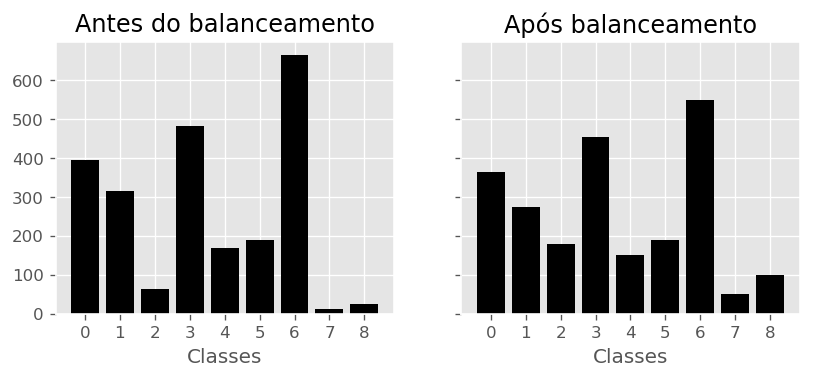

In [54]:
plt.style.use('ggplot')
fig, axes = plt.subplots(1,2, figsize=(8, 3), dpi = 120, squeeze = False, sharey='row')
vetor = [counts_elements, counts_elements5]
titulo = ['Antes do balanceamento', 'Após balanceamento']
k=0
for linha in axes:
    for ax in linha:
        ax.bar(np.arange(9), vetor[k], color='black')
        ax.set_xlabel('Classes'); # x label
        ax.set_title(titulo[k])
        #ax.set_xticklabels(['1','2','3','4','5','6','7','8','9'])
        ax.set_xticks(np.arange(9))
        k+=1

plt.show()

In [55]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [56]:
# Cria uma função para construir a Confusion Matrix de forma gráfica
def CriaConfusionMatrix(cm):
    #confusionMatrix = confusion_matrix(y_test, predictions)
    ConfusionMatrixNorm = np.around(cm / cm.sum(axis=1)[:, np.newaxis] * 100, decimals=0)
    sns.heatmap(ConfusionMatrixNorm, annot=True,cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.title('Confusion Matrix %')
    plt.ylabel('Label verdadeiro')
    plt.xlabel('Label previsto')
    return plt.show()

ExtraTreesClassifier -> Acurácia: Média = 0.535 Desvio Padrão = 0.016
Avaliação do Modelo nos Dados de Teste
              precision    recall  f1-score   support

           0       0.45      0.29      0.36       170
           1       0.46      0.26      0.33       136
           2       0.14      0.19      0.16        26
           3       0.55      0.60      0.57       201
           4       0.31      0.20      0.24        74
           5       0.54      0.45      0.49        83
           6       0.52      0.76      0.61       287
           7       0.00      0.00      0.00         6
           8       0.54      0.64      0.58        11

    accuracy                           0.49       994
   macro avg       0.39      0.38      0.37       994
weighted avg       0.48      0.49      0.47       994



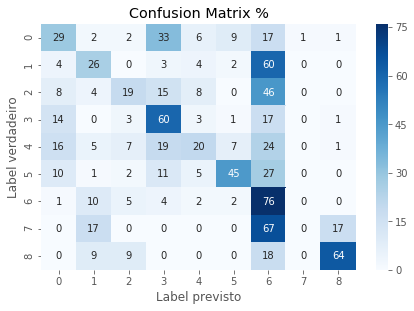

In [57]:
# Criando um modelo Random Forest para extraírmos as palavras mais relevantes
modeloRF = RandomForestClassifier()
modeloRF.fit(X_treino, y_treino)
# Score
scores = cross_val_score(modeloRF, X_treino, y_treino, cv = 5, scoring = 'accuracy', n_jobs = -1)
# Imprimindo o resultado
print ("ExtraTreesClassifier -> Acurácia: Média = %0.3f Desvio Padrão = %0.3f" % (np.mean(scores), np.std(scores)))

# Faz as predições
predictions = modeloRF.predict(X_test)
# Performande do modelo nos dados de teste
print("Avaliação do Modelo nos Dados de Teste")
print(classification_report(y_test, predictions))
# Confusion Matrix do Modelo Final
CriaConfusionMatrix(confusion_matrix(y_test, predictions))

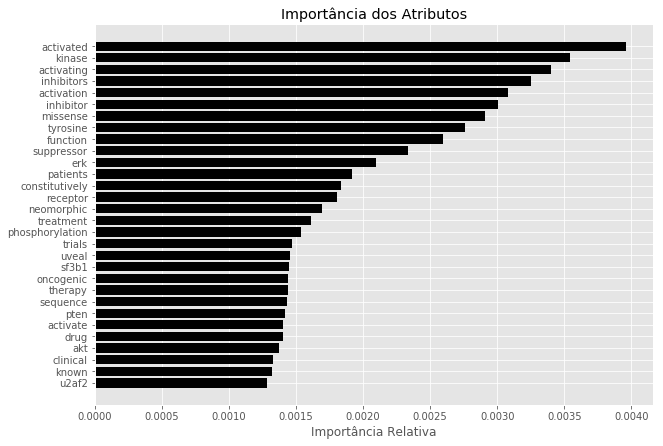

In [58]:
# Extraindo as importâncias
importances = modeloRF.feature_importances_
indices = np.argsort(importances)

# Obtém os índices
ind=[]
for i in indices:
    ind.append(variaveis[i])

# Plot da Importância dos Atributos
#plt.figure(1)
plt.figure(figsize=(10,7))
plt.title('Importância dos Atributos')
plt.barh(range(len(indices[-30:])), importances[indices[-30:]], color = 'black', align = 'center')
plt.yticks(range(len(indices[-30:])),ind[-30:])
#plt.xlim([0,0.005])
plt.xlabel('Importância Relativa')
plt.show()

Como o projeto sugeria, vamos criar alguns modelos no keras

In [59]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [60]:
# Transforma as variáveis em HotEncode
y_treinoHotEncode = to_categorical(y_treino)
y_testHotEncode = to_categorical(y_test)

In [61]:
# Dimensao de entrada
dimensao = X_treino.shape[1]

Vamos testar alguns modelos de redes, variando a otimização e topologia.

- Otimização:
    - Adam
    - SGD
    - RMSprop

- Topologia: 
    - 2 e 3 camadas ocultas
    - Com e sem dropout para regularização

In [62]:
# Função que define a rede para fazermos o Grid Search
def CriaModeloKeras(numCamadas, numNeuronios, numDropout, otimizador):
    # Cria o modelo
    model = Sequential()
    # Camda de entrada
    model.add(Dense(numNeuronios, input_dim=dimensao, activation='relu'))
    if numDropout != 0: model.add(Dropout(numDropout))
    # Camada 2
    model.add(Dense(numNeuronios, activation='relu'))
    if numDropout != 0: model.add(Dropout(numDropout))
    # Camada 3
    if numCamadas == 3: model.add(Dense(numNeuronios, activation='relu'))
    if numDropout != 0 and numCamadas == 3: model.add(Dropout(numDropout))
    # Camada de saída
    model.add(Dense(9, activation='softmax'))
    
    # Compila o modelo
    model.compile(loss='categorical_crossentropy', optimizer=otimizador, metrics=['accuracy'])
    return model

In [66]:
# Função para o Grid Search
def GriSearchKeras(otimizador, numCamadas, numNeuronios, numDropout, batch_size, epochs):
    acuracias = []
    parametros = []
    for camada in numCamadas:
        for neuronio in numNeuronios:
            for dropout in numDropout:
                for batch in batch_size:
                    for epoch in epochs:
                        modeloKeras = CriaModeloKeras(camada,neuronio,dropout,otimizador)
                        modeloKeras.fit(X_treino, y_treinoHotEncode, epochs = epoch, batch_size = batch, verbose=0)
                        scores = modeloKeras.evaluate(X_test, y_testHotEncode, verbose=0)
                        acuracias.append(scores[1])
                        parametros.append(dict(Camadas=camada, Neuronios=neuronio, Dropout=dropout, Batch=batch, Epoch=epoch))
                        print("%s: %.1f%% (Camadas: %.0f | Neuronios: %.0f | Dropout: %.1f | Batch: %.0f | Epoch: %.0f |)" % (modeloKeras.metrics_names[1], scores[1]*100, camada, neuronio, dropout, batch, epoch))
    return acuracias, parametros

In [64]:
# Definindo os hyperparametros
optimizers = [SGD(lr = 0.01, momentum = 0.9, nesterov = True), 'adam','rmsprop']

numCamadas = [2,3]
numNeuronios = [50,150]
numDropout = [0,0.5]
batch_size = [10, 20]
epochs = [50, 150]

In [65]:
# Testando o otimizador Stochastic gradient descent
acuraciasSGD, parametrosSGD = GriSearchKeras(optimizers[0], numCamadas, numNeuronios, numDropout, batch_size, epochs)

accuracy: 44.3% (Camadas: 2 | Neuronios: 50 | Dropout: 0 | Batch: 10 | Epoch: 50 |)
accuracy: 44.8% (Camadas: 2 | Neuronios: 50 | Dropout: 0 | Batch: 10 | Epoch: 150 |)
accuracy: 43.9% (Camadas: 2 | Neuronios: 50 | Dropout: 0 | Batch: 20 | Epoch: 50 |)
accuracy: 46.1% (Camadas: 2 | Neuronios: 50 | Dropout: 0 | Batch: 20 | Epoch: 150 |)
accuracy: 45.5% (Camadas: 2 | Neuronios: 50 | Dropout: 0 | Batch: 10 | Epoch: 50 |)
accuracy: 48.0% (Camadas: 2 | Neuronios: 50 | Dropout: 0 | Batch: 10 | Epoch: 150 |)
accuracy: 49.0% (Camadas: 2 | Neuronios: 50 | Dropout: 0 | Batch: 20 | Epoch: 50 |)
accuracy: 47.8% (Camadas: 2 | Neuronios: 50 | Dropout: 0 | Batch: 20 | Epoch: 150 |)
accuracy: 46.8% (Camadas: 2 | Neuronios: 150 | Dropout: 0 | Batch: 10 | Epoch: 50 |)
accuracy: 46.4% (Camadas: 2 | Neuronios: 150 | Dropout: 0 | Batch: 10 | Epoch: 150 |)
accuracy: 46.9% (Camadas: 2 | Neuronios: 150 | Dropout: 0 | Batch: 20 | Epoch: 50 |)
accuracy: 48.0% (Camadas: 2 | Neuronios: 150 | Dropout: 0 | Batch: 2

In [67]:
# Testando o otimizador Adam
acuraciasAdam, parametrosAdam = GriSearchKeras(optimizers[1], numCamadas, numNeuronios, numDropout, batch_size, epochs)

accuracy: 46.7% (Camadas: 2 | Neuronios: 50 | Dropout: 0.0 | Batch: 10 | Epoch: 50 |)
accuracy: 47.5% (Camadas: 2 | Neuronios: 50 | Dropout: 0.0 | Batch: 10 | Epoch: 150 |)
accuracy: 48.4% (Camadas: 2 | Neuronios: 50 | Dropout: 0.0 | Batch: 20 | Epoch: 50 |)
accuracy: 46.9% (Camadas: 2 | Neuronios: 50 | Dropout: 0.0 | Batch: 20 | Epoch: 150 |)
accuracy: 49.3% (Camadas: 2 | Neuronios: 50 | Dropout: 0.5 | Batch: 10 | Epoch: 50 |)
accuracy: 47.0% (Camadas: 2 | Neuronios: 50 | Dropout: 0.5 | Batch: 10 | Epoch: 150 |)
accuracy: 49.1% (Camadas: 2 | Neuronios: 50 | Dropout: 0.5 | Batch: 20 | Epoch: 50 |)
accuracy: 48.9% (Camadas: 2 | Neuronios: 50 | Dropout: 0.5 | Batch: 20 | Epoch: 150 |)
accuracy: 47.0% (Camadas: 2 | Neuronios: 150 | Dropout: 0.0 | Batch: 10 | Epoch: 50 |)
accuracy: 46.1% (Camadas: 2 | Neuronios: 150 | Dropout: 0.0 | Batch: 10 | Epoch: 150 |)
accuracy: 48.3% (Camadas: 2 | Neuronios: 150 | Dropout: 0.0 | Batch: 20 | Epoch: 50 |)
accuracy: 47.7% (Camadas: 2 | Neuronios: 150 |

In [79]:
# Testando o otimizador RMSProp
acuraciasRMSProp, parametrosRMSProp = GriSearchKeras(optimizers[2], numCamadas, numNeuronios, numDropout, batch_size, epochs)

accuracy: 46.5% (Camadas: 2 | Neuronios: 50 | Dropout: 0.0 | Batch: 10 | Epoch: 50 |)
accuracy: 46.2% (Camadas: 2 | Neuronios: 50 | Dropout: 0.0 | Batch: 10 | Epoch: 150 |)
accuracy: 47.3% (Camadas: 2 | Neuronios: 50 | Dropout: 0.0 | Batch: 20 | Epoch: 50 |)
accuracy: 46.3% (Camadas: 2 | Neuronios: 50 | Dropout: 0.0 | Batch: 20 | Epoch: 150 |)
accuracy: 49.0% (Camadas: 2 | Neuronios: 50 | Dropout: 0.5 | Batch: 10 | Epoch: 50 |)
accuracy: 47.5% (Camadas: 2 | Neuronios: 50 | Dropout: 0.5 | Batch: 10 | Epoch: 150 |)
accuracy: 49.3% (Camadas: 2 | Neuronios: 50 | Dropout: 0.5 | Batch: 20 | Epoch: 50 |)
accuracy: 48.1% (Camadas: 2 | Neuronios: 50 | Dropout: 0.5 | Batch: 20 | Epoch: 150 |)
accuracy: 45.8% (Camadas: 2 | Neuronios: 150 | Dropout: 0.0 | Batch: 10 | Epoch: 50 |)
accuracy: 43.3% (Camadas: 2 | Neuronios: 150 | Dropout: 0.0 | Batch: 10 | Epoch: 150 |)
accuracy: 47.2% (Camadas: 2 | Neuronios: 150 | Dropout: 0.0 | Batch: 20 | Epoch: 50 |)
accuracy: 47.1% (Camadas: 2 | Neuronios: 150 |

In [84]:
BestSGD = max(acuraciasSGD)
BestSGDParameters = parametrosSGD[acuraciasSGD.index(BestSGD)]
print('Modelo SGD: %.2f%%' % (BestSGD*100))
print(BestSGDParameters)
print('\n')

BestAdam = max(acuraciasAdam)
BestAdamParameters = parametrosAdam[acuraciasAdam.index(BestAdam)]
print('Modelo Adam: %.2f%%' % (BestAdam*100))
print(BestAdamParameters)
print('\n')

BestRMSProp = max(acuraciasRMSProp)
BestRMSPropParameters = parametrosRMSProp[acuraciasRMSProp.index(BestRMSProp)]
print('Modelo RMSProp: %.2f%%' % (BestRMSProp*100))
print(BestRMSPropParameters)

Modelo SGD: 51.41%
{'Camadas': 2, 'Neuronios': 150, 'Dropout': 0.5, 'Batch': 20, 'Epoch': 50}


Modelo Adam: 49.70%
{'Camadas': 3, 'Neuronios': 50, 'Dropout': 0.5, 'Batch': 20, 'Epoch': 150}


Modelo RMSProp: 49.70%
{'Camadas': 2, 'Neuronios': 150, 'Dropout': 0.5, 'Batch': 20, 'Epoch': 50}


In [85]:
# Recriando o melhor modelo
modeloKeras = CriaModeloKeras(2,150,0.5,optimizers[0])
modeloKeras.fit(X_treino, y_treinoHotEncode, epochs = 50, batch_size = 20, verbose=0)

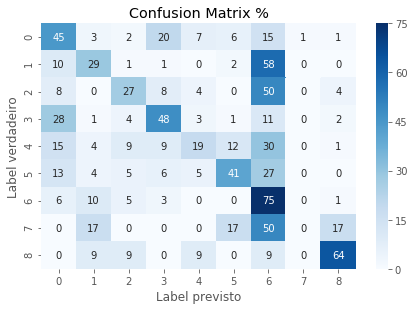

In [90]:
# Confusion matrix
predictions = modeloKeras.predict(X_test)
# Confusion Matrix do Modelo Final
CriaConfusionMatrix(confusion_matrix(y_test, predictions.argmax(axis=1)))

Conclusão:

O modelo conseguiu classificar aproximadamente 50% das classes corretamente. Dado que é um problema multiclasses com 9 classes e a probabilidade de classificação ao acaso é de 11%, o modelo consegue agregar valor. Apesar disso, sua acurácia ainda está longe da ideal. Para aumenta-la, poderíamos aplicar maior tratamento ao texto, utilizar outras técnicas como word2vec e até mesmo tentarmos rede neurais maiores, o que exigiria maior capacidade de treinamento.